In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the Datasets

In [2]:
df = pd.read_csv('D:/Weather Forecasting/forecast_data.csv')


Checking whether the data in the columns is continious or discrete

In [3]:

X = df[['humidity', 'pressure_mb', 'wind_mph', 'cloud', 'feelslike_c']]
y = df['temp_c']
# Analyze each column's data type and unique values
for column in df.columns:
    unique_values = df[column].nunique()
    dtype = df[column].dtype
    
    if dtype == 'object' or unique_values < 20:  # Heuristic: Treat columns with <20 unique values as discrete
        print(f"{column}: Discrete (Data Type: {dtype}, Unique Values: {unique_values})")
    else:
        print(f"{column}: Continuous (Data Type: {dtype}, Unique Values: {unique_values})")


time_epoch: Continuous (Data Type: int64, Unique Values: 588)
time: Discrete (Data Type: object, Unique Values: 192)
temp_c: Continuous (Data Type: float64, Unique Values: 363)
temp_f: Continuous (Data Type: float64, Unique Values: 615)
is_day: Discrete (Data Type: int64, Unique Values: 2)
condition: Discrete (Data Type: object, Unique Values: 41)
wind_mph: Continuous (Data Type: float64, Unique Values: 205)
wind_kph: Continuous (Data Type: float64, Unique Values: 266)
wind_degree: Continuous (Data Type: int64, Unique Values: 360)
wind_dir: Discrete (Data Type: object, Unique Values: 16)
pressure_mb: Continuous (Data Type: float64, Unique Values: 23)
pressure_in: Continuous (Data Type: float64, Unique Values: 67)
precip_mm: Continuous (Data Type: float64, Unique Values: 231)
precip_in: Continuous (Data Type: float64, Unique Values: 39)
humidity: Continuous (Data Type: int64, Unique Values: 96)
cloud: Continuous (Data Type: int64, Unique Values: 101)
feelslike_c: Continuous (Data Type: 

Describing the Dataset


In [4]:
df.describe()

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph
count,2.956800e+04,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,...,29568.000000,29568.000000,29568.000000,29568.000000,29568.0,29568.0,29568.000000,29568.000000,29568.000000,29568.000000
mean,1.634580e+09,25.152307,77.273793,0.477070,5.077486,8.169619,177.818452,1008.341112,29.775472,0.101552,...,18.650761,65.571567,0.089928,12.155202,0.0,0.0,9.263460,5.488433,7.947697,12.791274
std,1.995536e+05,4.797702,8.635461,0.499482,2.847123,4.582337,103.545331,3.438631,0.101294,0.406883,...,5.715956,10.288746,0.286084,24.999675,0.0,0.0,1.986747,1.281815,4.141102,6.665310
min,1.634227e+09,1.500000,34.700000,0.000000,0.000000,0.000000,0.000000,999.000000,29.490000,0.000000,...,-8.200000,17.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.634408e+09,22.500000,72.600000,0.000000,3.100000,4.900000,83.000000,1006.000000,29.690000,0.000000,...,16.000000,60.800000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,4.900000,7.900000
50%,1.634580e+09,25.100000,77.200000,0.000000,4.500000,7.200000,174.000000,1008.000000,29.780000,0.000000,...,20.400000,68.700000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,7.300000,11.800000
75%,1.634753e+09,28.100000,82.600000,1.000000,6.500000,10.400000,273.000000,1011.000000,29.850000,0.040000,...,22.900000,73.300000,0.000000,3.000000,0.0,0.0,10.000000,6.000000,10.400000,16.700000
max,1.634958e+09,39.300000,102.700000,1.000000,22.400000,36.000000,359.000000,1021.000000,30.160000,20.930000,...,30.200000,86.400000,1.000000,94.000000,0.0,0.0,10.000000,6.000000,32.700000,52.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_epoch      29568 non-null  int64  
 1   time            29568 non-null  object 
 2   temp_c          29568 non-null  float64
 3   temp_f          29568 non-null  float64
 4   is_day          29568 non-null  int64  
 5   condition       29568 non-null  object 
 6   wind_mph        29568 non-null  float64
 7   wind_kph        29568 non-null  float64
 8   wind_degree     29568 non-null  int64  
 9   wind_dir        29568 non-null  object 
 10  pressure_mb     29568 non-null  float64
 11  pressure_in     29568 non-null  float64
 12  precip_mm       29568 non-null  float64
 13  precip_in       29568 non-null  float64
 14  humidity        29568 non-null  int64  
 15  cloud           29568 non-null  int64  
 16  feelslike_c     29568 non-null  float64
 17  feelslike_f     29568 non-null 

Displaying first few rows from the Dataset

In [6]:
df.head()

,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,state,city
0,1634236200,2021-10-15 00:00,23.2,73.8,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.3,6.8,41,NE,...,0,0,0,0,10.0,6.0,8.9,14.4,Andhra Pradesh,Amaravati
1,1634239800,2021-10-15 01:00,23.0,73.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.1,6.6,34,NE,...,0,0,0,0,10.0,6.0,8.6,13.9,Andhra Pradesh,Amaravati
2,1634243400,2021-10-15 02:00,22.7,72.9,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.0,6.4,28,NNE,...,0,0,0,0,10.0,6.0,8.4,13.4,Andhra Pradesh,Amaravati
3,1634247000,2021-10-15 03:00,22.5,72.5,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.8,6.1,22,NNE,...,0,0,0,0,10.0,6.0,8.1,13.0,Andhra Pradesh,Amaravati
4,1634250600,2021-10-15 04:00,22.3,72.1,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.7,6.0,23,NNE,...,0,0,0,0,10.0,6.0,7.9,12.7,Andhra Pradesh,Amaravati


In [7]:
df.tail()

,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,state,city
29563,1634909400,2021-10-22 19:00,25.7,78.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.0,4.8,334,NNW,...,0,0,0,0,10.0,6.0,6.0,9.7,West Bengal,Durgapur
29564,1634913000,2021-10-22 20:00,24.8,76.6,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.1,4.9,342,NNW,...,0,0,0,0,10.0,6.0,6.3,10.1,West Bengal,Durgapur
29565,1634916600,2021-10-22 21:00,23.9,75.0,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.1,5.0,351,N,...,0,0,0,0,10.0,6.0,6.5,10.4,West Bengal,Durgapur
29566,1634920200,2021-10-22 22:00,23.3,74.0,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",2.8,4.4,237,WSW,...,0,0,0,0,10.0,6.0,5.7,9.2,West Bengal,Durgapur
29567,1634923800,2021-10-22 23:00,22.8,73.0,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",2.4,3.8,123,ESE,...,0,0,0,0,10.0,6.0,5.0,8.0,West Bengal,Durgapur


Finding number of rows and columns 

In [8]:
#finding the number of rows and columns
rows,columns = df.shape
print(f'The Number of rows is {rows } and no of columns is {columns}')

The Number of rows is 29568 and no of columns is 34


Finding the number of missing values

In [9]:
missing_values = df.isna().sum().sum()
print(f'The number of missing values is {missing_values} ')

The number of missing values is 0 


Data Visualisation

Scatter Plot

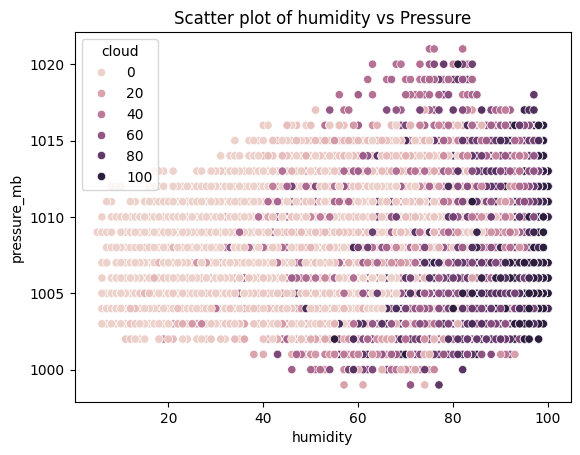

In [10]:
sns.scatterplot(x='humidity',y='pressure_mb',data=df,hue='cloud')
plt.title('Scatter plot of humidity vs Pressure')
plt.show()

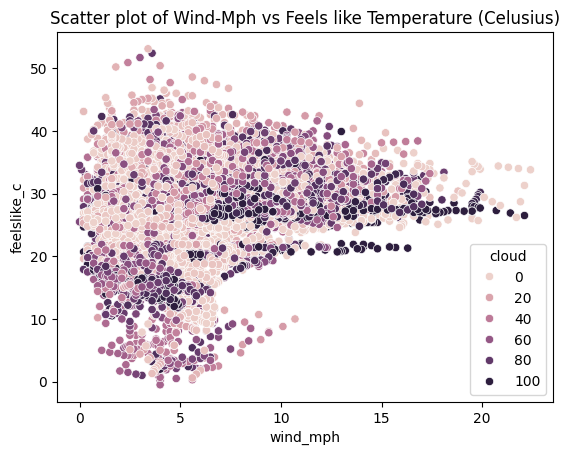

In [11]:
sns.scatterplot(x='wind_mph',y='feelslike_c',data=df,hue='cloud')
plt.title('Scatter plot of Wind-Mph vs Feels like Temperature (Celusius)')
plt.show()

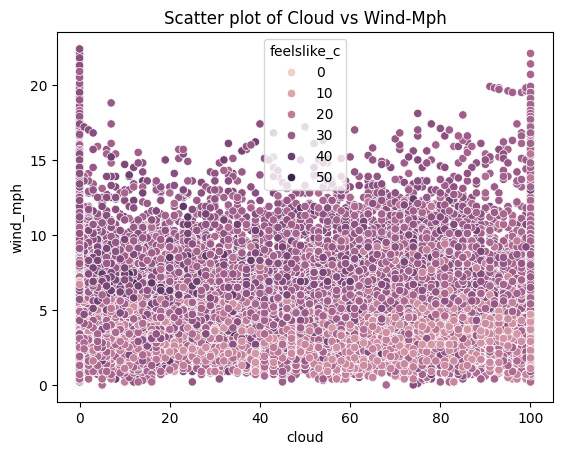

In [12]:
sns.scatterplot(x='cloud',y='wind_mph',data=df,hue='feelslike_c')
plt.title('Scatter plot of Cloud vs Wind-Mph')
plt.show()

Histogram

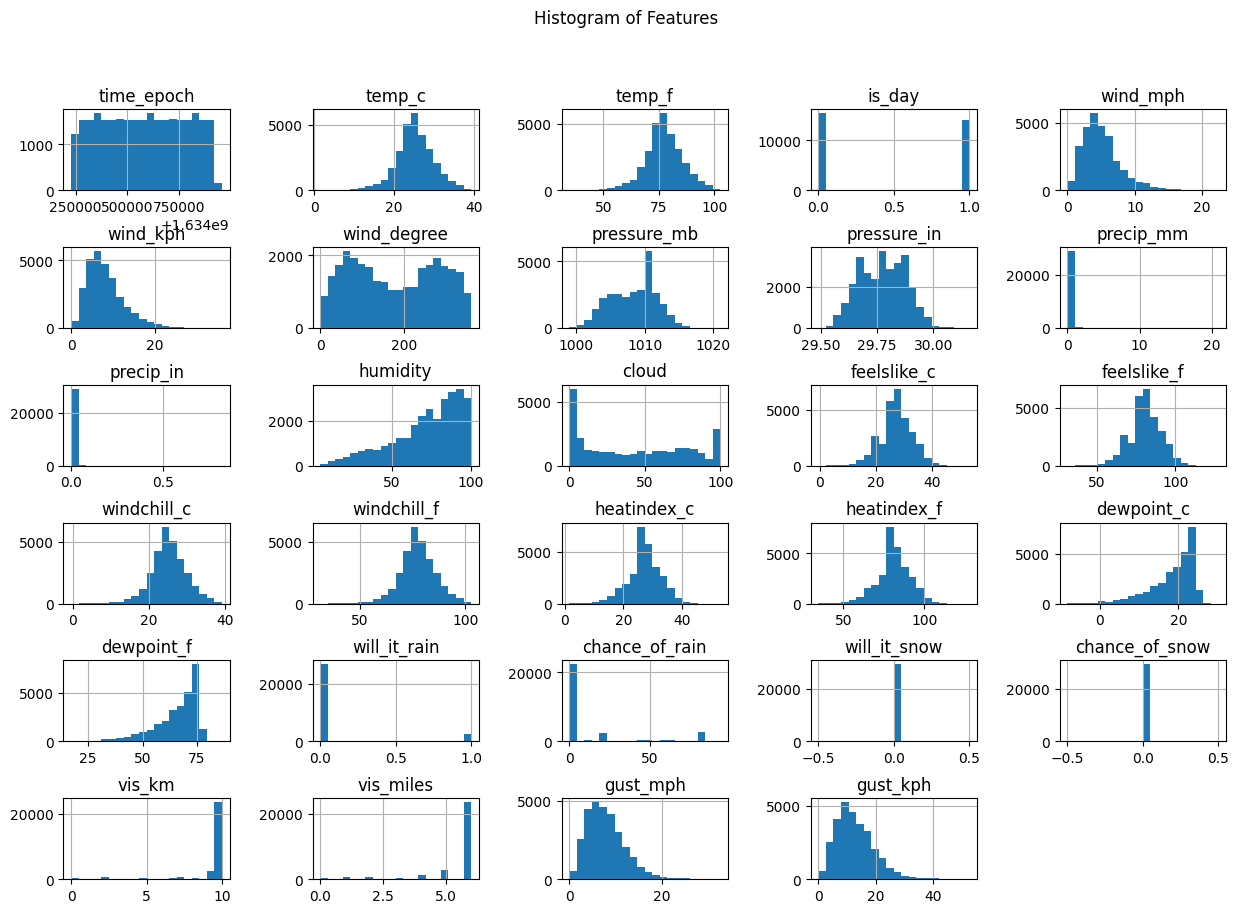

In [13]:
# Set the figure size for all subplots
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histogram of Features')

# Adjust spacing between the subplots
plt.subplots_adjust(hspace=0.7, wspace=0.5)  # hspace controls the vertical spacing, wspace controls horizontal spacing

plt.show()


Joint Plot

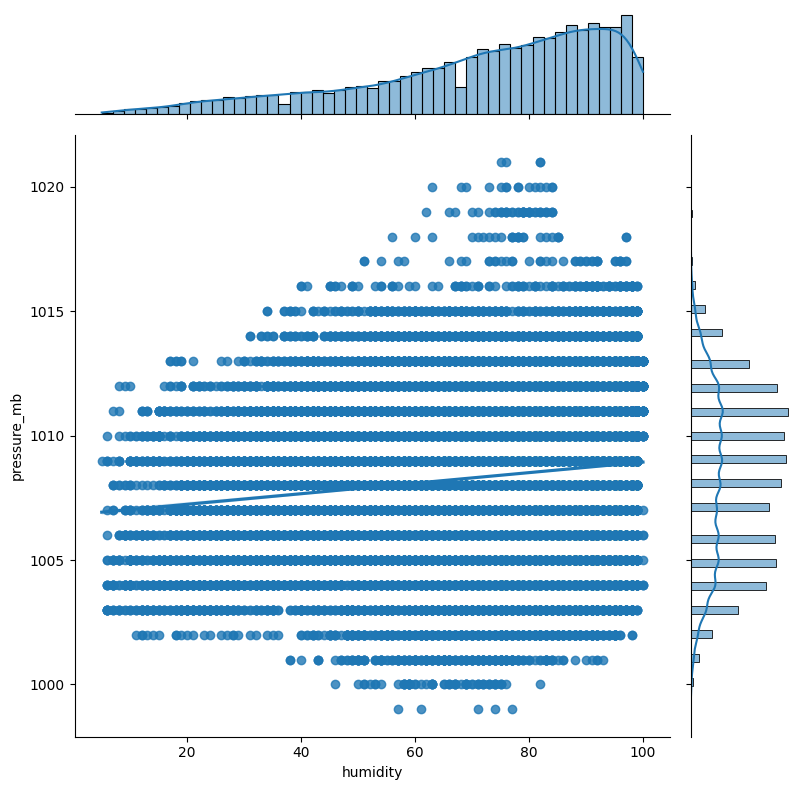

In [14]:


# Specify two numeric columns to visualize
x_col = 'humidity'  # Replace with the name of your first numeric column
y_col = 'pressure_mb'  # Replace with the name of your second numeric column

# Create a joint plot
sns.jointplot(data=df, x=x_col, y=y_col, kind="reg", height=8)  # Adjust height to control the figure size
plt.show()


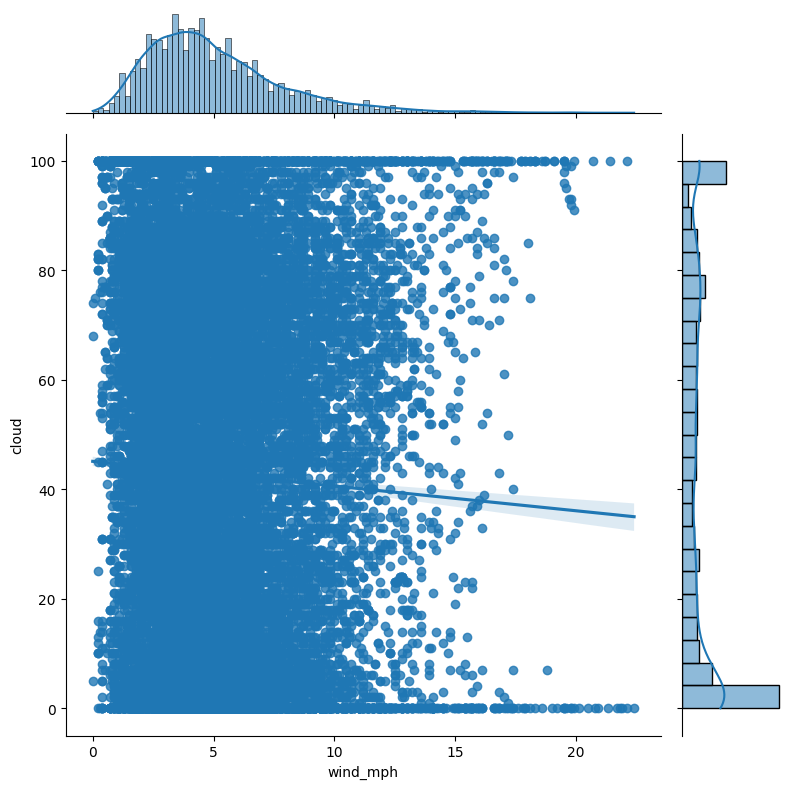

In [15]:
# Specify two numeric columns to visualize
x_col = 'wind_mph'  # Replace with the name of your first numeric column
y_col = 'cloud'  # Replace with the name of your second numeric column

# Create a joint plot
sns.jointplot(data=df, x=x_col, y=y_col, kind="reg", height=8)  # Adjust height to control the figure size
plt.show()


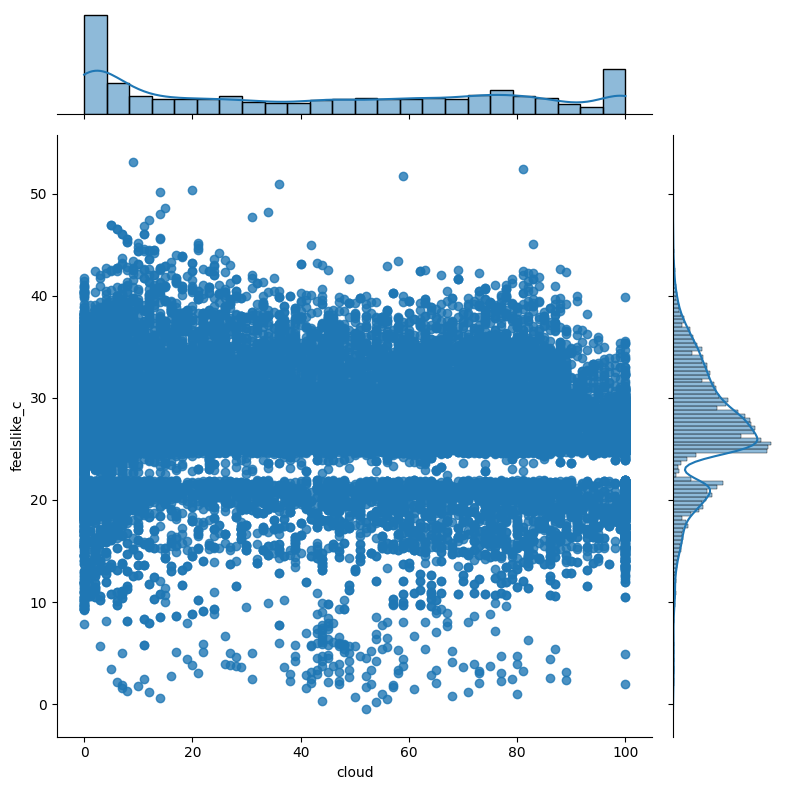

In [16]:


# Specify two numeric columns to visualize
x_col = 'cloud'  # Replace with the name of your first numeric column
y_col = 'feelslike_c'  # Replace with the name of your second numeric column

# Create a joint plot
sns.jointplot(data=df, x=x_col, y=y_col, kind="reg", height=8)  # Adjust height to control the figure size
plt.show()


Correlation HeatMap for all the Numeric features in the dataset

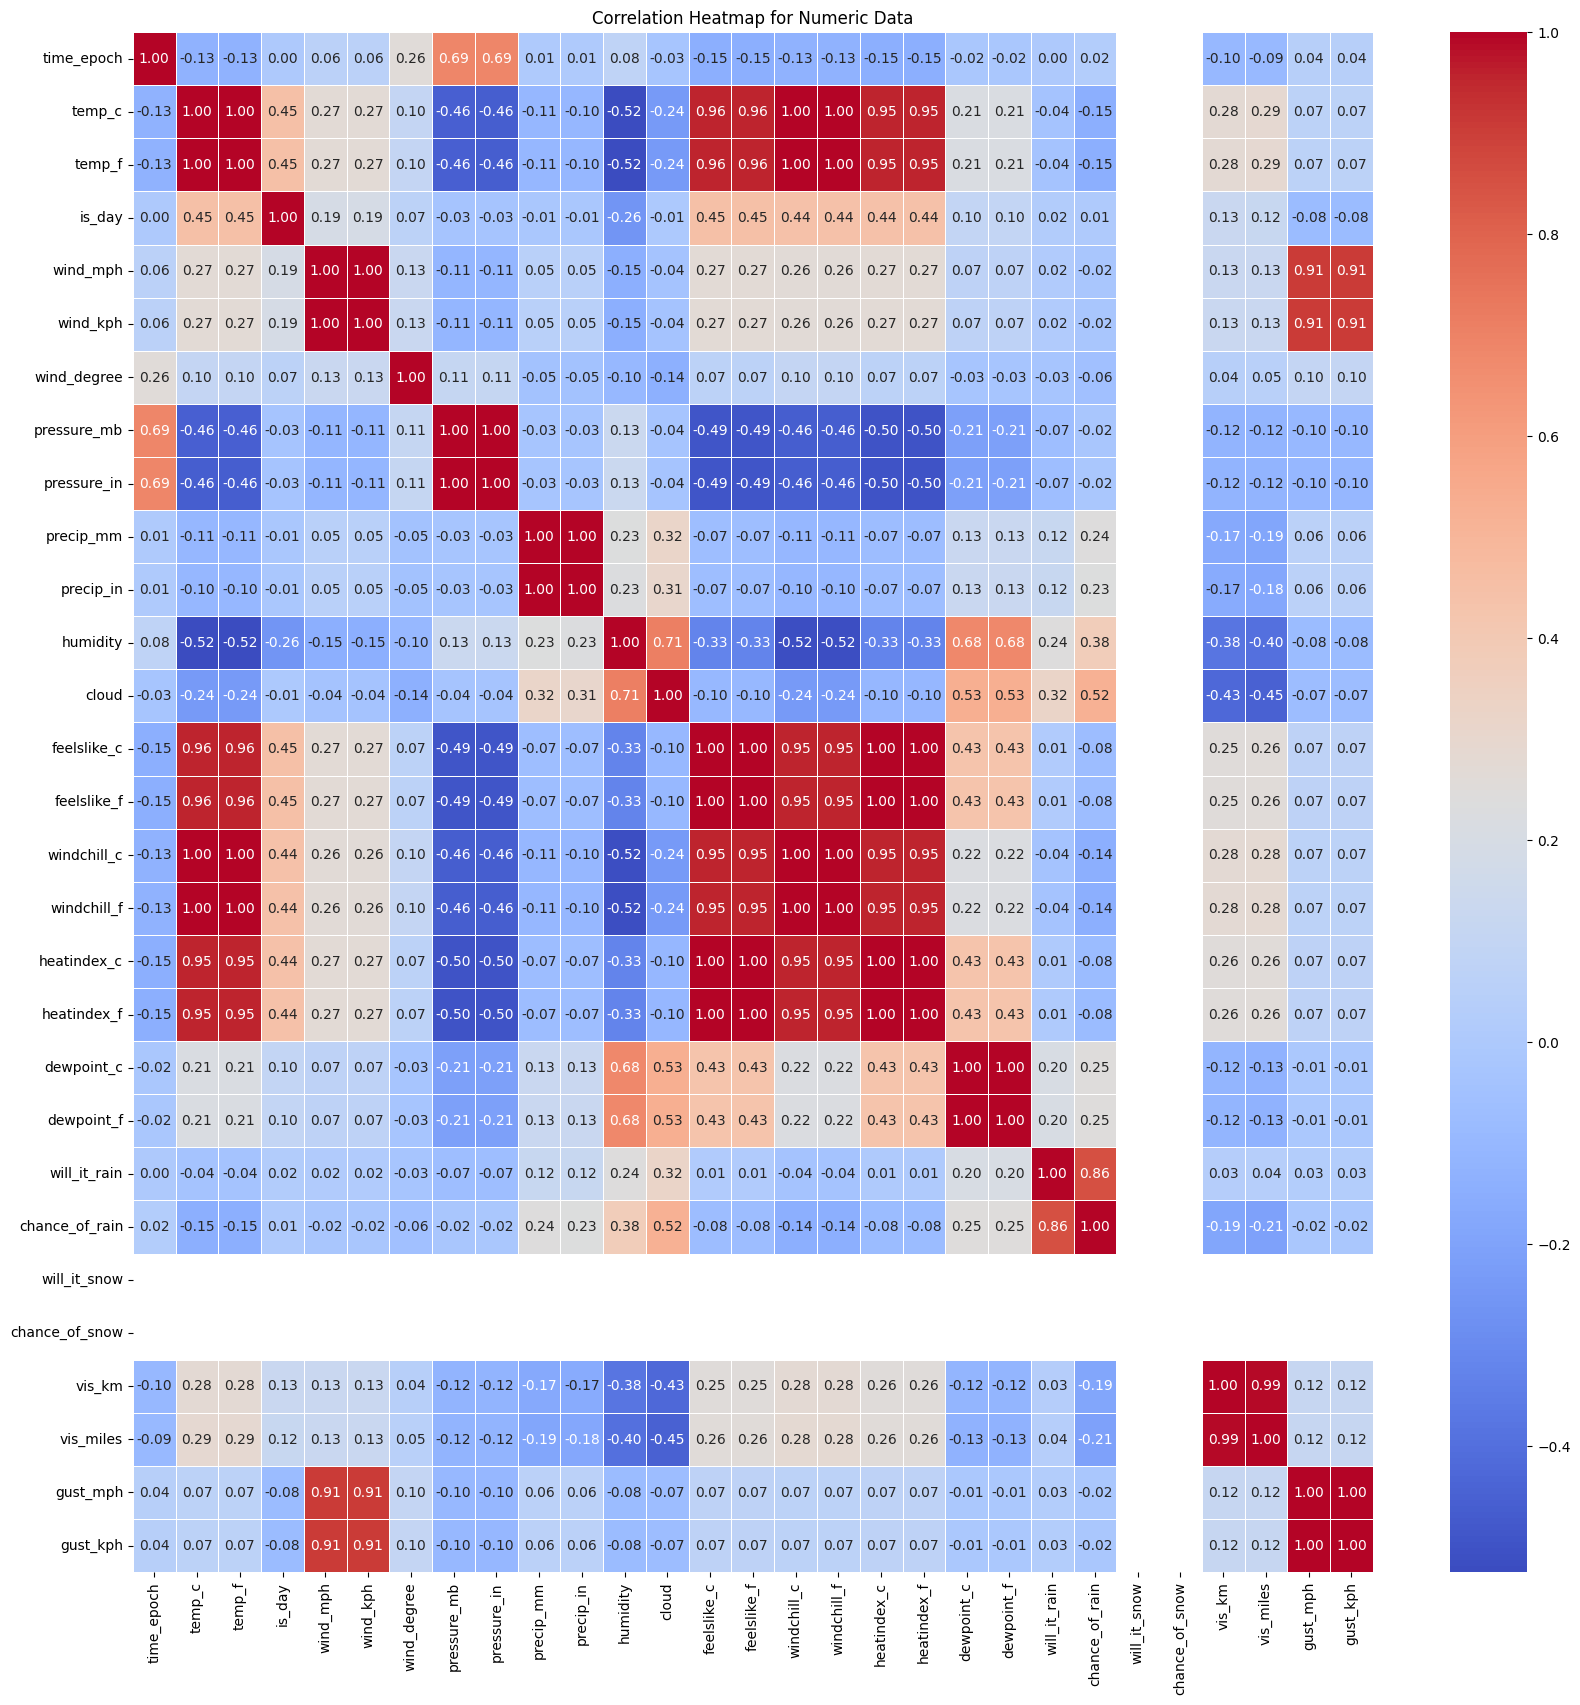

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Data")
plt.show()


Outliers Detection and Removing the Outliers


In [18]:
from sklearn.model_selection import train_test_split

# Selecting features and target
X = df[['humidity', 'pressure_mb', 'wind_mph', 'cloud', 'feelslike_c']]
y = df['temp_c']

from sklearn.ensemble import IsolationForest
print(len(X))
print(len(y))
# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
outlier_preds = iso_forest.fit_predict(X)

# Find indices where outliers are detected (-1 represents an outlier)
outlier_indices = [index for index, value in enumerate(outlier_preds) if value == -1]

# Count the number of outliers and display their indices
num_outliers = len(outlier_indices)
print(f"Number of outliers detected: {num_outliers}")
print(len(outlier_indices))
print("Indices of outliers:", outlier_indices)

# Drop the outliers from X and y
X_cleaned = X.drop(index=outlier_indices).reset_index(drop=True)
y_cleaned = y.drop(index=outlier_indices).reset_index(drop=True)


29568
29568
Number of outliers detected: 1479
1479
Indices of outliers: [61, 62, 63, 85, 86, 87, 107, 108, 109, 110, 111, 112, 131, 132, 133, 134, 135, 136, 182, 183, 184, 185, 231, 252, 253, 254, 255, 279, 326, 327, 372, 492, 538, 539, 540, 541, 542, 564, 636, 660, 681, 682, 683, 684, 685, 1167, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1212, 1213, 1214, 1215, 1216, 1237, 1238, 1239, 1240, 1261, 1262, 1263, 1264, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 

Using Balancing Algoritms to do Balancing for Imbalance dataset


In [19]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

# Assuming X_cleaned and y_cleaned are your feature and target data, respectively
X = np.array(X_cleaned)
y = np.array(y_cleaned)

# Step 1: Discretize the target variable (y) into discrete bins
# We can use KBinsDiscretizer to convert continuous target into discrete classes
# You can adjust the number of bins based on your specific dataset

n_bins = 10  # Adjust number of bins as per your requirement
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_binned = kbins.fit_transform(y.reshape(-1, 1)).flatten()

# Step 2: Apply SMOTE on the discretized target variable
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binned)

# Step 3: Optionally, convert back to continuous values
# For example, you can use the mean of each bin as the representative continuous value
y_resampled_continuous = kbins.inverse_transform(y_resampled.reshape(-1, 1)).flatten()

# Step 4: Check distributions of the target before and after balancing
print("Target distribution before balancing:")
print(np.min(y), np.max(y))

print("Target distribution after balancing:")
print(np.min(y_resampled_continuous), np.max(y_resampled_continuous))

# Step 5: Split the resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_continuous, test_size=0.2, random_state=42)


Target distribution before balancing:
6.2 38.6
Target distribution after balancing:
7.82 36.980000000000004


Data Balancing

In [20]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import KBinsDiscretizer

# Assuming y_cleaned is the target variable
y = np.array(y_cleaned)

# Step 1: Check the class distribution of y_cleaned
y_counts = pd.Series(y).value_counts()
print("Class Distribution in y_cleaned:\n", y_counts)

# Step 2: Calculate class imbalance ratio
min_class = y_counts.min()
max_class = y_counts.max()
imbalance_ratio = max_class / min_class
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")

# Display if data is balanced or imbalanced based on the ratio
if imbalance_ratio > 1.5:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")

# Step 3: Apply SMOTE if dataset is imbalanced
if imbalance_ratio > 1.5:
    # If the target is continuous, we need to discretize it before applying SMOTE
    n_bins = 10  # Adjust number of bins as per your requirement
    kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    y_binned = kbins.fit_transform(y.reshape(-1, 1)).flatten()  # Discretize target variable

    # Apply SMOTE on the binned target variable
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_binned)

    # Step 4: Convert resampled target back to continuous values (inverse transform)
    y_resampled_continuous = kbins.inverse_transform(y_resampled.reshape(-1, 1)).flatten()

    # Step 5: Check the new class distribution after SMOTE
    y_resampled_counts = pd.Series(y_resampled_continuous).value_counts()
    print("\nClass Distribution after SMOTE:\n", y_resampled_counts)

    # Calculate imbalance ratio after SMOTE
    min_class_resampled = y_resampled_counts.min()
    max_class_resampled = y_resampled_counts.max()
    imbalance_ratio_resampled = max_class_resampled / min_class_resampled
    print(f"\nImbalance Ratio after SMOTE: {imbalance_ratio_resampled:.2f}")

    # Check if balanced after SMOTE
    if imbalance_ratio_resampled > 1.5:
        print("The dataset is still imbalanced after SMOTE.")
    else:
        print("The dataset is balanced after SMOTE.")
else:
    print("No SMOTE applied, as the dataset is already balanced.")


Class Distribution in y_cleaned:
 24.6    351
25.1    348
24.8    335
24.0    334
25.3    329
       ... 
8.7       1
9.0       1
8.2       1
7.3       1
6.2       1
Name: count, Length: 293, dtype: int64

Imbalance Ratio: 351.00
The dataset is imbalanced.

Class Distribution after SMOTE:
 24.02    9501
20.78    9501
27.26    9501
30.50    9501
33.74    9501
17.54    9501
14.30    9501
7.82     9501
11.06    9501
36.98    9501
Name: count, dtype: int64

Imbalance Ratio after SMOTE: 1.00
The dataset is balanced after SMOTE.


Deep Learning Algorithms

Long Short Term Memory

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import KBinsDiscretizer

# Ensure X_cleaned and y_cleaned are NumPy arrays
X = np.array(X_cleaned)
y = np.array(y_cleaned)

# Step 1: Discretize the target variable if it's continuous (for SMOTE)
n_bins = 10  # Adjust number of bins as per your requirement
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_binned = kbins.fit_transform(y.reshape(-1, 1)).flatten()  # Discretize target variable

# Step 2: Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binned)

# Step 3: Rescale the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Step 4: Reshape X for LSTM (samples, timesteps, features)
X_resampled = X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))

# Step 5: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Determine the number of classes for the output layer
num_classes = len(np.unique(y_resampled))  # Get the number of unique classes in y_resampled

# Step 7: Build an enhanced LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(50, activation='relu'))x
model.add(Dropout(0.2))

# Add output layer
if num_classes > 2:
    model.add(Dense(num_classes, activation='softmax'))  # For multi-class classification
else:
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Step 8: Compile the model
loss_function = 'sparse_categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_function, metrics=['accuracy'])

# Step 9: Fit the model with more epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 10: Evaluate the model and print accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")


SyntaxError: invalid syntax (1114065491.py, line 40)

Evaluation Metrics for LSTM

c:\Users\bavar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
703/703 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 295.2608 - mae: 13.9201 - val_loss: 3.0272 - val_mae: 1.3563
Epoch 2/100
703/703 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 11.2083 - mae: 2.6423 - val_loss: 0.6578 - val_mae: 0.6784
Epoch 3/100
703/703 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 8.9962 - mae: 2.3659 - val_loss: 0.2782 - val_mae: 0.4072
Epoch 4/100
703/703 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 8.3790 - mae: 2.2850 - val_loss: 0.5488 - val_mae: 0.6449
Epoch 5/100
703/703 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 8.2462 - mae: 2.2642 - val_loss: 0.4128 - val_mae: 0.5399
Epoch 6/100
703/703 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8.0468 - mae: 2.2311 - val_loss: 0.2499 - val_mae: 0.3959
Epoch 7/100
703/703 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 7.8031 - mae: 2.1955 - val_loss: 0.2661 - val_mae: 0.4151
Epoch 8/100
703/703 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7.5750 - mae: 2.1680 - val_loss: 0.6248 - val_mae: 0.7069
Epoch 9/100
703/703 ━━━━━━━━━━━━━━━━━━━━ 4s

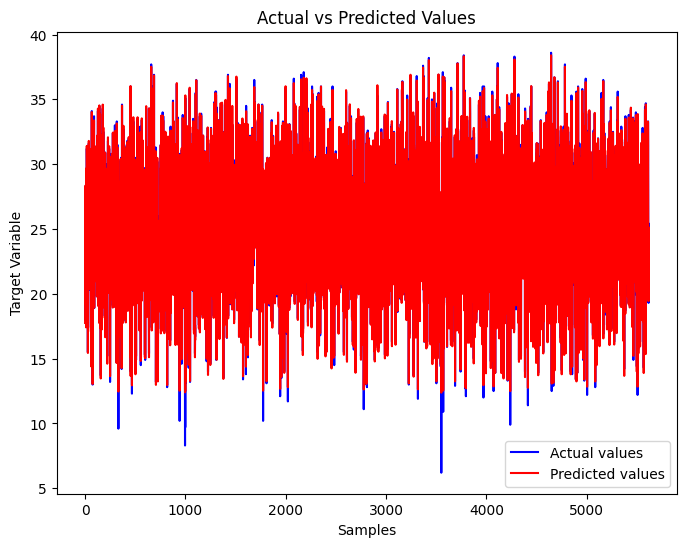

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Assuming X_cleaned and y_cleaned are already prepared as NumPy arrays
X = np.array(X_cleaned)
y = np.array(y_cleaned)

# Step 1: Preprocessing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the LSTM model for regression
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Single output for regression

# Step 4: Compile the model with mean squared error loss for regression
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Step 5: Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 6: Fit the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Step 7: Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Model Mean Absolute Error (MAE) on Test Data: {mae:.2f}")
print(f"Model Loss (Mean Squared Error) on Test Data: {loss:.2f}")

# Step 8: Predict values for the test set
y_pred = model.predict(X_test)

# Step 9: Calculate and print regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Step 10: Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual values', color='blue')
plt.plot(y_pred, label='Predicted values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


Recurrent Neural Network

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import KBinsDiscretizer

# Ensure X_cleaned and y_cleaned are NumPy arrays
X = np.array(X_cleaned)
y = np.array(y_cleaned)

# Step 1: Discretize the target variable if it's continuous (for SMOTE)
n_bins = 10  # Adjust the number of bins as per your requirement
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_binned = kbins.fit_transform(y.reshape(-1, 1)).flatten()  # Discretize the target variable

# Step 2: Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binned)

# Step 3: Rescale the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Step 4: Reshape X for RNN (samples, timesteps, features)
X_resampled = X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))

# Step 5: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Determine the number of classes for the output layer
num_classes = len(np.unique(y_resampled))  # Get the number of unique classes in y_resampled

# Step 7: Build a simple RNN model
model = Sequential()
model.add(SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(SimpleRNN(50, activation='relu'))
model.add(Dropout(0.2))

# Add output layer
if num_classes > 2:
    model.add(Dense(num_classes, activation='softmax'))  # For multi-class classification
else:
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Step 8: Compile the model
loss_function = 'sparse_categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_function, metrics=['accuracy'])

# Step 9: Fit the model with more epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 10: Evaluate the model and print accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")


Epoch 1/100


c:\Users\bavar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2376/2376 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.6067 - loss: 0.9876 - val_accuracy: 0.9481 - val_loss: 0.1980
Epoch 2/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8754 - loss: 0.3132 - val_accuracy: 0.9533 - val_loss: 0.1271
Epoch 3/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9115 - loss: 0.2260 - val_accuracy: 0.9593 - val_loss: 0.1089
Epoch 4/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9289 - loss: 0.1860 - val_accuracy: 0.9705 - val_loss: 0.0844
Epoch 5/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9390 - loss: 0.1600 - val_accuracy: 0.9658 - val_loss: 0.0829
Epoch 6/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9430 - loss: 0.1465 - val_accuracy: 0.9686 - val_loss: 0.0772
Epoch 7/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9505 - loss: 0.1289 - val_accuracy: 0.9717 - val_loss: 0.0714
Epoch 8/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9522 - loss: 0.123

Deep Neural Netowrks

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import KBinsDiscretizer

# Ensure X_cleaned and y_cleaned are NumPy arrays
X = np.array(X_cleaned)
y = np.array(y_cleaned)

# Step 1: Discretize the target variable if it's continuous (for SMOTE)
n_bins = 10  # Adjust the number of bins as per your requirement
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_binned = kbins.fit_transform(y.reshape(-1, 1)).flatten()  # Discretize the target variable

# Step 2: Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binned)

# Step 3: Rescale the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Determine the number of classes for the output layer
num_classes = len(np.unique(y_resampled))  # Get the number of unique classes in y_resampled

# Step 6: Build a DNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Add output layer
if num_classes > 2:
    model.add(Dense(num_classes, activation='softmax'))  # For multi-class classification
else:
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Step 7: Compile the model
loss_function = 'sparse_categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_function, metrics=['accuracy'])

# Step 8: Fit the model with more epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 9: Evaluate the model and print accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")


c:\Users\bavar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5489 - loss: 1.1212 - val_accuracy: 0.9148 - val_loss: 0.2431
Epoch 2/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8396 - loss: 0.4091 - val_accuracy: 0.9480 - val_loss: 0.1600
Epoch 3/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8798 - loss: 0.3161 - val_accuracy: 0.9530 - val_loss: 0.1299
Epoch 4/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9039 - loss: 0.2626 - val_accuracy: 0.9623 - val_loss: 0.1016
Epoch 5/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9159 - loss: 0.2373 - val_accuracy: 0.9668 - val_loss: 0.0888
Epoch 6/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9236 - loss: 0.2117 - val_accuracy: 0.9694 - val_loss: 0.0870
Epoch 7/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9317 - loss: 0.1945 - val_accuracy: 0.9692 - val_loss: 0.0760
Epoch 8/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9360 - l

Evaluation Metrics for DNN

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Ensure X_cleaned and y_cleaned are NumPy arrays
X = np.array(X_cleaned)
y = np.array(y_cleaned)

# Step 1: Discretize the target variable if it's continuous (for SMOTE)
n_bins = 10  # Adjust the number of bins as per your requirement
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_binned = kbins.fit_transform(y.reshape(-1, 1)).flatten()  # Discretize the target variable

# Step 2: Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binned)

# Step 3: Rescale the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Determine the number of classes for the output layer
num_classes = len(np.unique(y_resampled))  # Get the number of unique classes in y_resampled

# Step 6: Build a DNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

# Add output layer
if num_classes > 2:
    model.add(Dense(num_classes, activation='softmax'))  # For multi-class classification
else:
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Step 7: Compile the model
loss_function = 'sparse_categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_function, metrics=['accuracy'])

# Step 8: Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")

# Step 10: Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict probabilities and classes
y_pred_probs = model.predict(X_test)
if num_classes > 2:
    y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Multi-class classification
else:
    y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()  # Binary classification

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='weighted' if num_classes > 2 else 'binary')
recall = recall_score(y_test, y_pred_classes, average='weighted' if num_classes > 2 else 'binary')
f1 = f1_score(y_test, y_pred_classes, average='weighted' if num_classes > 2 else 'binary')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Step 11: Compute and plot the ROC-AUC curve
if num_classes == 2:  # Only for binary classification
    auc_score = roc_auc_score(y_test, y_pred_probs)
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    print(f"ROC-AUC Score: {auc_score:.2f}")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Epoch 1/100


c:\Users\bavar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2376/2376 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6315 - loss: 0.8978 - val_accuracy: 0.9394 - val_loss: 0.1971
Epoch 2/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8712 - loss: 0.3157 - val_accuracy: 0.9535 - val_loss: 0.1316
Epoch 3/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9052 - loss: 0.2393 - val_accuracy: 0.9537 - val_loss: 0.1213
Epoch 4/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9215 - loss: 0.2033 - val_accuracy: 0.9707 - val_loss: 0.0792
Epoch 5/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9313 - loss: 0.1762 - val_accuracy: 0.9721 - val_loss: 0.0705
Epoch 6/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9374 - loss: 0.1637 - val_accuracy: 0.9661 - val_loss: 0.0751
Epoch 7/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9433 - loss: 0.1495 - val_accuracy: 0.9667 - val_loss: 0.0824
Epoch 8/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9467 - loss: 0.1432 - val_

Convolutional Neural Networks

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Ensure input shape is correct
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape to (samples, time steps, features)

model = Sequential()

# First Convolution Block with stride
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), strides=2, padding='same'))
model.add(BatchNormalization())  # Helps stabilize learning
model.add(Dropout(0.3))

# Second Convolution Block with stride
model.add(Conv1D(128, kernel_size=3, activation='relu', strides=2, padding='same'))
model.add(BatchNormalization())  # Helps stabilize learning
model.add(Dropout(0.3))

# Third Convolution Block with stride
model.add(Conv1D(256, kernel_size=3, activation='relu', strides=2, padding='same'))
model.add(BatchNormalization())  # Helps stabilize learning
model.add(Dropout(0.4))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer (for multi-class classification)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model with more epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model and print accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")


c:\Users\bavar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - accuracy: 0.6364 - loss: 0.9596 - val_accuracy: 0.9188 - val_loss: 0.2100
Epoch 2/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.8334 - loss: 0.4056 - val_accuracy: 0.9378 - val_loss: 0.1646
Epoch 3/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.8637 - loss: 0.3417 - val_accuracy: 0.8959 - val_loss: 0.2393
Epoch 4/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.8799 - loss: 0.3048 - val_accuracy: 0.9564 - val_loss: 0.1263
Epoch 5/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8913 - loss: 0.2762 - val_accuracy: 0.9494 - val_loss: 0.1234
Epoch 6/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.8997 - loss: 0.2587 - val_accuracy: 0.9596 - val_loss: 0.1039
Epoch 7/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.9057 - loss: 0.2417 - val_accuracy: 0.9588 - val_loss: 0.1057
Epoch 8/100
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 

Evaluation metrics for CNN

594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 97.75%
Confusion Matrix:
[[1982    0    0    0    0    0    0    0    0    0]
 [   0 1958    0    0    0    0    0    0    0    0]
 [   0    7 1879    8    0    0    0    0    0    0]
 [   0    0    3 1895    0    0    0    0    0    0]
 [   0    0    0   33 1850   49    0    0    0    0]
 [   0    0    0    0   81 1787   35    0    0    0]
 [   0    0    0    0    0   31 1816   17    0    0]
 [   0    0    0    0    0    0   38 1800   43    0]
 [   0    0    0    0    0    0    0   11 1815    1]
 [   0    0    0    0    0    0    0    0   70 1793]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1982
         1.0       1.00      1.00      1.00      1958
         2.0       1.00      0.99      1.00      1894
         3.0       0.98      1.00      0.99      1898
         4.0       0.96      0.96      0.96      1932
         5.0       0.96      0.94      0.95  

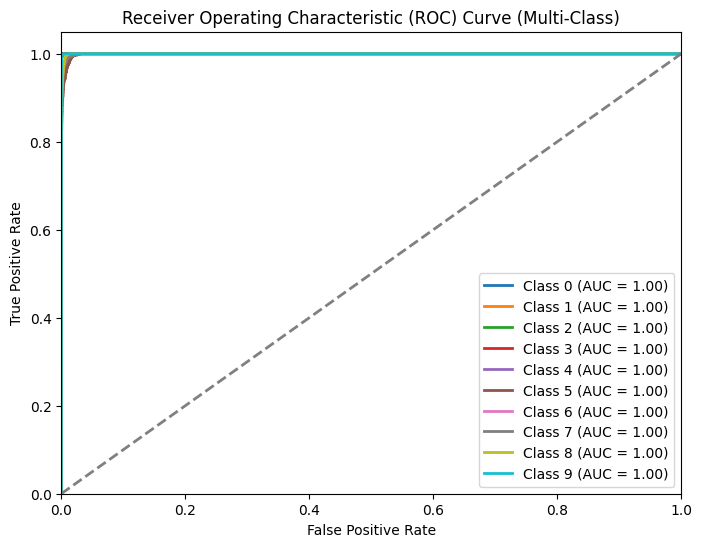

In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming y_test and model are available
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)  # For multi-class classification
y_true_class = y_test

# 1. Accuracy
accuracy = accuracy_score(y_true_class, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 2. Confusion Matrix
cm = confusion_matrix(y_true_class, y_pred_class)
print(f"Confusion Matrix:\n{cm}")

# 3. Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_true_class, y_pred_class))

# 4. ROC Curve & AUC (for multi-class classification)
# If it's a binary classification problem, you can directly use `y_pred_class` and `y_true_class`
if num_classes == 2:
    # For binary classification, consider using the positive class probabilities (y_pred[:, 1])
    fpr, tpr, thresholds = roc_curve(y_true_class, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

else:
    # For multi-class classification, use One-Versus-Rest (OvR) approach
    y_true_bin = label_binarize(y_true_class, classes=np.arange(num_classes))  # One-hot encoding
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Multi-Class)')
    plt.legend(loc='lower right')
    plt.show()

# 5. AUC (Area Under Curve)
# AUC was already calculated above in the ROC curve section

